# A look at our data

### General game statistics

Mean, median (mode for binary).

SD, range, IQR (spread of middle 50%)

Shape: skewness (distribution symmetric or skewed) and kurtosis (distribution heavy or light tailed)

Frequency tables/proportions (for cat indicators such as turnovers).

Plots to visualize patterns, distributions, and relationships. Univariate: hist for continuous vars, bar for cat vars, box for comparing between groups. Bivariate: scat, line plots (if data is temporal), heatmaps/corr matrices

#### Normality & Assumption Checks (If Needed)
Even in exploratory work, it's wise to check distributional assumptions if you’re:
- Summarizing with means and SD
- Comparing group means
- Planning to build models (like regression)

How to check:
- Visual: Histograms, QQ-plots
- Statistical: Shapiro-Wilk test, Kolmogorov-Smirnov test
    - Note: These are sensitive to large samples, so interpret with plots.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
mean_datapoints = (605 + 534 + 538 + 520 + 748 + 566 + 542 + 727 + 672 + 556 + 658 + 618) / 12
mean_datapoints

607.0

In [51]:
df = pd.read_csv("data/cleaned/game_stats.csv")
df

,game_id,a_total_minutes,b_total_minutes,first_half_dur,second_half_dur,total_timeout_duration,total_gametime_excl_breaks,total_gametime
0,1,50.921667,35.447217,36.672783,57.813900,4.981683,94.403655,99.836117
1,2,50.961100,21.353350,32.614450,52.433333,9.304433,84.892709,89.830000
2,3,41.156100,45.059467,40.298883,50.607217,3.924983,90.840684,93.627217
3,4,42.016667,37.284450,47.868883,37.803900,5.390550,85.582941,89.124450
4,5,35.175567,51.821650,39.573883,58.556100,5.442217,98.039280,100.186100
5,6,51.082200,38.441150,56.200000,39.531117,5.331100,95.642265,100.240000
6,7,40.337200,25.478900,40.380550,37.930000,10.847233,78.129763,83.137767
7,8,51.335000,45.543317,67.669433,40.992767,10.447233,108.488079,112.937767
8,9,44.668883,36.549467,80.008333,33.767783,30.232217,113.272246,117.736117
9,10,31.509967,34.710583,40.162217,32.356667,4.051667,72.451356,75.862767


In [52]:
df.describe()

,game_id,a_total_minutes,b_total_minutes,first_half_dur,second_half_dur,total_timeout_duration,total_gametime_excl_breaks,total_gametime
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,44.493883,37.773571,49.840786,43.531668,8.981157,93.222768,97.313517
std,3.605551,6.962699,8.664375,14.353747,9.007482,7.161602,11.738887,11.845544
min,1.000000,31.509967,21.353350,32.614450,32.356667,3.924983,72.451356,75.862767
25%,3.750000,40.951375,35.203458,40.015133,37.898475,5.243746,85.410383,89.653612
50%,6.500000,43.445000,36.916958,44.124717,40.261942,6.649442,95.022960,100.011108
75%,9.250000,50.991375,45.180429,58.071121,51.063746,10.084733,98.436835,101.830700
max,12.000000,52.541133,51.821650,80.008333,58.556100,30.232217,113.272246,117.736117


In [53]:
mean_time_all_teams = (df['a_total_minutes'].mean() + df['b_total_minutes'].mean()) / 2
print(f'The average that each team was on offense is {mean_time_all_teams:.1f} minutes.')

The average that each team was on offense is 41.1 minutes.


In [54]:
print(f'On average, the first half took {df['first_half_dur'].mean():.1f} minutes and the second half took {df['second_half_dur'].mean():.1f} minutes.')

On average, the first half took 49.8 minutes and the second half took 43.5 minutes.


In [55]:
print(f'On average, the total gametime was {df['total_gametime'].mean():.1f} minutes for each game, and {df['total_gametime_excl_breaks'].mean():.1f} minutes excluding the breaks (half time, timeouts).')

On average, the total gametime was 97.3 minutes for each game, and 93.2 minutes excluding the breaks (half time, timeouts).


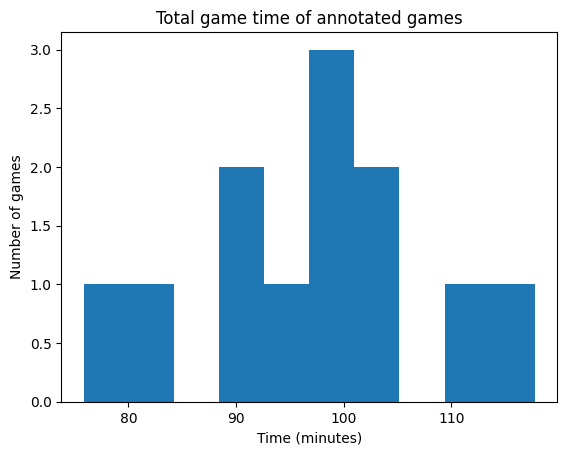

In [56]:
x = df['total_gametime']
y = df['game_id']

plt.hist(x)
# plt.plot(y, x)
plt.xlabel('Time (minutes)')
plt.ylabel('Number of games')
plt.title('Total game time of annotated games')
plt.show()

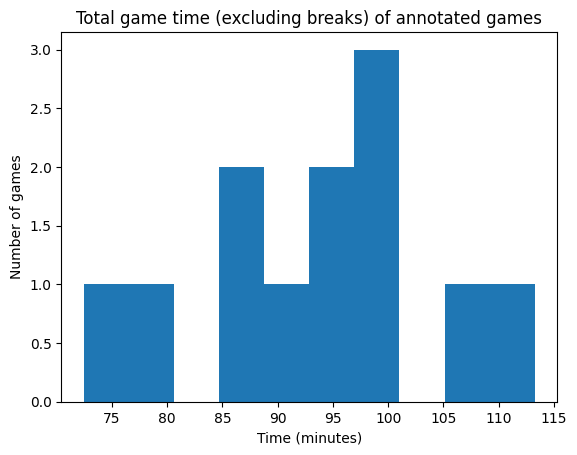

In [57]:
x = df['total_gametime_excl_breaks']
y = df['game_id']

plt.hist(x)
plt.xlabel('Time (minutes)')
plt.ylabel('Number of games')
plt.title('Total game time (excluding breaks) of annotated games')
plt.show()

### Description of team-based indicator data

In [58]:
df = pd.read_csv("data/cleaned/summary_indicators.csv")
df

,team_id,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,avg_passes_per_score,pass_rate,avg_poss
0,01_teamA,1,15,18,0.833333,53.940355,94.832827,10,5,15,17,1,14.733333,6.460904,101.843333
1,01_teamB,0,14,21,0.666667,37.548564,87.394958,7,8,15,16,1,3.285714,3.357104,73.339069
2,02_teamA,1,15,17,0.882353,60.030008,96.078431,3,7,10,16,1,9.733333,5.003817,122.306640
3,02_teamB,0,7,15,0.466667,25.153338,88.194444,6,11,17,16,1,6.285714,6.743673,53.383375
4,03_teamA,0,14,18,0.777778,45.305802,90.960452,8,8,16,15,1,4.142857,4.300699,82.312200
5,03_teamB,1,15,21,0.714286,49.602738,91.584158,11,5,16,16,1,6.600000,4.482965,87.211871
6,04_teamA,0,13,16,0.812500,49.094675,95.454545,7,4,11,15,1,8.846154,5.759619,105.041667
7,04_teamB,1,15,19,0.789474,43.565283,92.957746,6,4,10,13,1,5.866667,3.808558,89.482680
8,05_teamA,0,11,18,0.611111,35.879055,89.805825,9,12,21,16,1,7.818182,5.856338,65.954188
9,05_teamB,1,15,18,0.833333,52.858048,95.502646,4,13,17,14,1,14.866667,7.294249,97.165594


In [59]:
df.describe()

,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,avg_passes_per_score,pass_rate,avg_poss
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.500000,12.416667,17.333333,0.720039,44.264304,92.323863,7.208333,8.833333,16.041667,16.291667,0.583333,8.482022,5.555526,87.167239
std,0.510754,3.119597,3.212295,0.157669,8.344578,2.717599,2.358687,3.497411,4.358691,1.680558,0.503610,4.335975,1.327137,18.134601
min,0.000000,6.000000,11.000000,0.400000,25.153338,87.394958,3.000000,4.000000,10.000000,13.000000,0.000000,3.285714,3.357104,53.383375
25%,0.000000,10.000000,15.000000,0.621528,38.963373,90.891146,6.000000,6.000000,13.250000,15.750000,0.000000,5.775000,4.463471,73.279035
50%,0.500000,14.000000,18.000000,0.746032,44.435542,91.878531,6.500000,8.500000,16.000000,16.000000,1.000000,6.600000,5.548554,88.211116
75%,1.000000,15.000000,19.000000,0.833333,50.109171,94.988256,9.000000,11.250000,19.000000,17.250000,1.000000,9.936364,6.236697,97.232532
max,1.000000,15.000000,24.000000,1.000000,60.030008,96.732026,12.000000,18.000000,25.000000,20.000000,1.000000,18.300000,8.104075,126.098720


In [ ]:
# print(f'On average, the first half took {df['first_half_dur'].mean():.1f} minutes and the second half took {df['second_half_dur'].mean():.1f} minutes.')

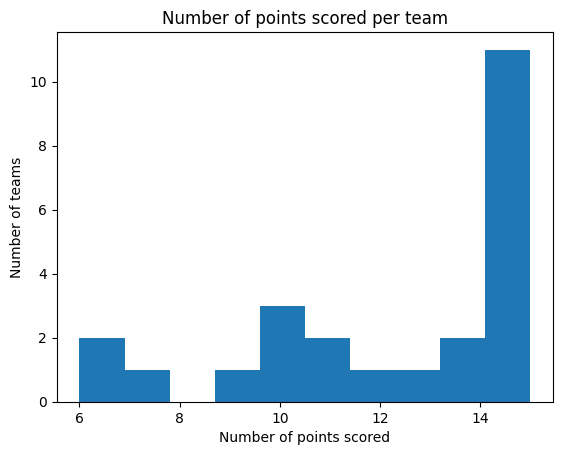

In [62]:
x = df['points_scored']
# y = df['game_id']

plt.hist(x)
plt.xlabel('Number of points scored')
plt.ylabel('Number of teams')
plt.title('Number of points scored per team')
plt.show()